#### [Alexnet Image Classification Model]

- 데이터셋 : ImageNet의 1000개 카테고리 이미지 사용
- 2012년 이미지 분류 모델 대회에서 우승한 모델

In [39]:
## 모듈 로딩
import torch
from torchvision.models import alexnet, AlexNet_Weights		## 사전학습 내장 모델 클래스 생성
from torchinfo import summary								## 모델 정보 확인용

In [40]:
## 모델 인스턴스 생성
model = alexnet(weights='DEFAULT')

In [41]:
## 모델 구조 확인
summary(model, input_size=(1, 3, 244,244))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 60, 60]           23,296
│    └─ReLU: 2-2                         [1, 64, 60, 60]           --
│    └─MaxPool2d: 2-3                    [1, 64, 29, 29]           --
│    └─Conv2d: 2-4                       [1, 192, 29, 29]          307,392
│    └─ReLU: 2-5                         [1, 192, 29, 29]          --
│    └─MaxPool2d: 2-6                    [1, 192, 14, 14]          --
│    └─Conv2d: 2-7                       [1, 384, 14, 14]          663,936
│    └─ReLU: 2-8                         [1, 384, 14, 14]          --
│    └─Conv2d: 2-9                       [1, 256, 14, 14]          884,992
│    └─ReLU: 2-10                        [1, 256, 14, 14]          --
│    └─Conv2d: 2-11                      [1, 256, 14, 14]         

In [42]:
## 모델 층 정보 추출
for name, param in model.named_parameters():
	print(name, param.shape)

features.0.weight torch.Size([64, 3, 11, 11])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 5, 5])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([1000, 4096])
classifier.6.bias torch.Size([1000])


- Alexnet 모델을 사용한 이미지 분류 <hr>

In [43]:
## 모델이 인식하는 형태로 이미지 전처리 필요
import torchvision.transforms as transforms

## 이미지 데이터 전처리 인스턴스 생성
preprocessing = transforms.Compose([
					transforms.Resize((256, 256)),
					transforms.CenterCrop((224, 224)),
					transforms.ToTensor(),
					transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
					])

In [44]:
## 사전학습 모델의 transform 인스턴스 추출 => transforms()
weights = AlexNet_Weights.DEFAULT
preprocess = weights.transforms()
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [45]:
## 사전학습 모델의 분류 클래스 정보 추출 => meta 속성의 categories키로 추출
CLASSES = weights.meta['categories']
IDX_TO_CLASS = dict(zip(range(1000), CLASSES))
IDX_TO_CLASS

{0: 'tench',
 1: 'goldfish',
 2: 'great white shark',
 3: 'tiger shark',
 4: 'hammerhead',
 5: 'electric ray',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich',
 10: 'brambling',
 11: 'goldfinch',
 12: 'house finch',
 13: 'junco',
 14: 'indigo bunting',
 15: 'robin',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel',
 21: 'kite',
 22: 'bald eagle',
 23: 'vulture',
 24: 'great grey owl',
 25: 'European fire salamander',
 26: 'common newt',
 27: 'eft',
 28: 'spotted salamander',
 29: 'axolotl',
 30: 'bullfrog',
 31: 'tree frog',
 32: 'tailed frog',
 33: 'loggerhead',
 34: 'leatherback turtle',
 35: 'mud turtle',
 36: 'terrapin',
 37: 'box turtle',
 38: 'banded gecko',
 39: 'common iguana',
 40: 'American chameleon',
 41: 'whiptail',
 42: 'agama',
 43: 'frilled lizard',
 44: 'alligator lizard',
 45: 'Gila monster',
 46: 'green lizard',
 47: 'African chameleon',
 48: 'Komodo dragon',
 49: 'African crocodile',
 50: 'American alligator',
 51: 'triceratops',
 

In [46]:
CLASSES

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [47]:
## 이미지 예측 테스트
import os

IMG_DIR = '../data/image/'

IMG_LIST = os.listdir(IMG_DIR)
print(f'IMG_LIST => {IMG_LIST}')

IMG_LIST = [ IMG_DIR+filename for filename in IMG_LIST if filename.endswith('.jpg')]
print(f'IMG_LIST => {IMG_LIST}')

IMG_LIST => ['금붕어.jpg', '닭.jpg', '바다사자.jpg', '아프리카 악어.jpg', '앵무새.jpg']
IMG_LIST => ['../data/image/금붕어.jpg', '../data/image/닭.jpg', '../data/image/바다사자.jpg', '../data/image/아프리카 악어.jpg', '../data/image/앵무새.jpg']


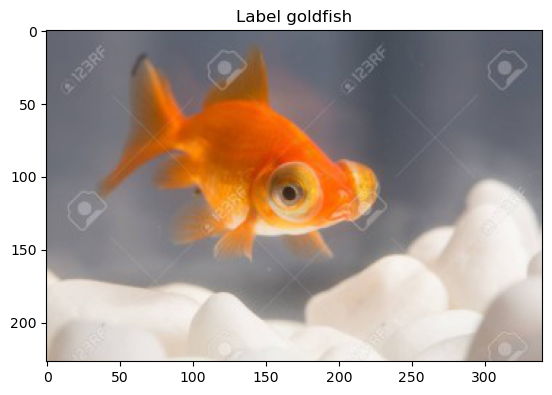

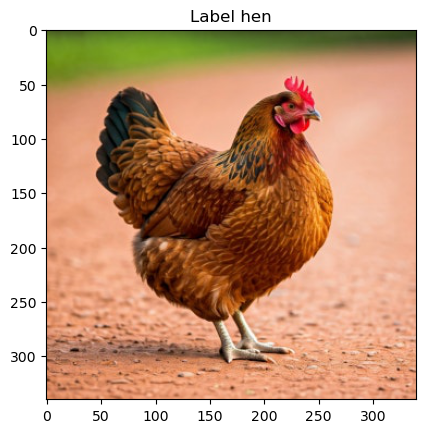

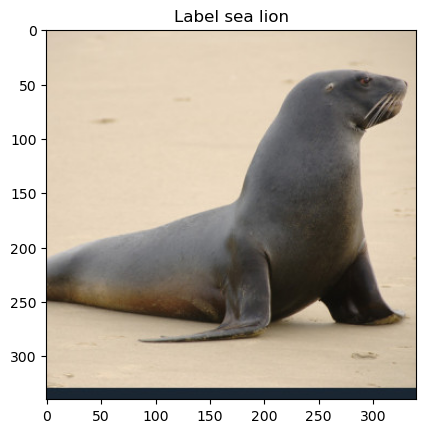

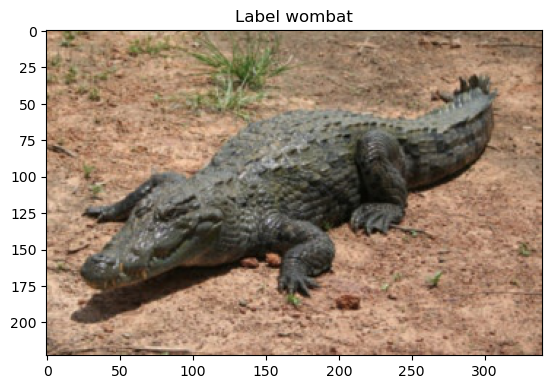

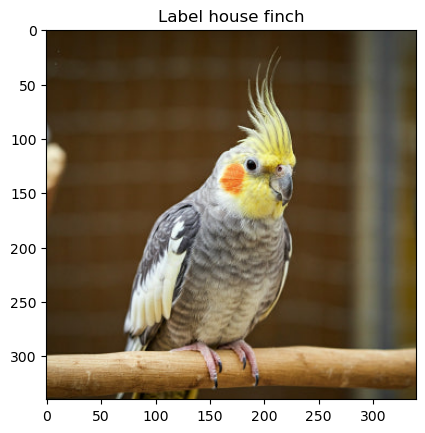

In [49]:
## 이미지 데이터 로딩 후 전처리 => 모델 => 예측값 체크
from PIL import Image
import matplotlib.pyplot as plt

for imgfile in IMG_LIST:
	img = Image.open(imgfile)
	#print(img)

	## 모델 입력 이미지 형태
	img_trans = preprocess(img)
	#print(img_trans.shape)

	## 모델 입력 shape 일치
	img_trans.unsqueeze_(0)
	#print(img_trans.shape)

	## 예측
	pre = model(img_trans)
	pre_target = pre.max(dim=1)[1].item()
	#print(f'pre => {pre.shape} {pre_target} {IDX_TO_CLASS.get(pre_target, "NONE")}')
	plt.imshow(img)
	plt.title(f'Label {IDX_TO_CLASS.get(pre_target, "None")}')
	plt.show()

